In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [37]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [38]:
def replace_placeholder(table):
    n = len(table.columns)
    for i in range(0,n):
        index = table.columns[i]
        the_median = table[index].median()
        table[index] = table[index].replace(-1, the_median)
    return table

In [41]:
def MinMaxNormal(df):
    normalized_df=(df-df.mean())/df.std()
    return normalized_df

In [42]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_pred)-MinMaxNormal(y_true))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [43]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,employment_data,male_life_expectency,female_life_expectency,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size,retail_sector_size = load_processed_quality_of_life_data()

In [44]:
quality_of_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])
quality_of_life_dataframe = quality_of_life_dataframe.transpose()
quality_of_life_dataframe = replace_placeholder(quality_of_life_dataframe)
old_data_frame = quality_of_life_dataframe
quality_of_life_dataframe

,median_houses_2020,Education,"Arts, entertainment, recreation & other services",Year 2020: One person households: Female ratio,Year 2020: One person households: Male ratio,Year 2020: Households with dependent children ratio,pop_ratio_under_10,pop_ratio_teenager,pop_ratio_20_39,pop_ratio_40_60,pop_ratio_60_80,pop_ratio_80_90+
0,315000.0,45.0,160.0,0.334971,0.239601,0.425429,0.115756,0.106984,0.202175,0.278545,0.227367,0.069173
1,164500.0,40.0,235.0,0.325149,0.253999,0.420852,0.092609,0.103231,0.195610,0.257785,0.273254,0.077512
2,415000.0,90.0,305.0,0.256636,0.172601,0.570763,0.118761,0.122377,0.205086,0.297435,0.199307,0.057034
3,195000.0,55.0,145.0,0.325329,0.277042,0.397628,0.088105,0.097388,0.183744,0.278789,0.279235,0.072739
4,178000.0,135.0,490.0,0.277233,0.261238,0.461528,0.125821,0.120430,0.249009,0.264058,0.192378,0.048304
...,...,...,...,...,...,...,...,...,...,...,...,...
342,225000.0,85.0,290.0,0.312153,0.224400,0.463447,0.109564,0.103223,0.200694,0.254322,0.260181,0.072016
343,325000.0,145.0,600.0,0.295381,0.260307,0.444312,0.101657,0.123749,0.298344,0.235082,0.186273,0.054895
344,242500.0,180.0,580.0,0.303717,0.242365,0.453918,0.100999,0.102533,0.213356,0.263223,0.252238,0.067650
345,187500.0,180.0,865.0,0.309556,0.237045,0.453399,0.097348,0.104799,0.185361,0.275835,0.266890,0.069767


In [45]:
quality_of_life_norm = MinMaxNormal(quality_of_life_dataframe)

In [46]:
quality_of_life_norm = quality_of_life_norm.iloc[:, quality_of_life_norm.columns != 'median_houses_2020'].astype('float')
cwd = os.getcwd()
quality_of_life_norm.to_csv(os.path.join(cwd, "ResultTables/quality_of_life_dataframe.csv"))  

In [47]:
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers/total_households_2020
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers_ratio.astype('float')
taxi_only_licensed_drivers_ratio = pd.DataFrame(taxi_only_licensed_drivers_ratio)
taxi_only_licensed_drivers_ratio.columns=['taxi_only_licensed_drivers_ratio_to_households']

total_drivers_ratio = total_drivers/total_households_2020
total_drivers_ratio = total_drivers_ratio.astype('float')
total_drivers_ratio = pd.DataFrame(total_drivers_ratio)
total_drivers_ratio.columns=['total_drivers_ratio_to_households']

health_sector_size_ratio = health_sector_size/total_households_2020
health_sector_size_ratio = health_sector_size_ratio.astype('float')
health_sector_size_ratio = pd.DataFrame(health_sector_size_ratio)
health_sector_size_ratio.columns=['health_sector_size_ratio_to_households']

retail_sector_size_ratio = retail_sector_size/total_households_2020
retail_sector_size_ratio = retail_sector_size_ratio.astype('float')
retail_sector_size_ratio = pd.DataFrame(retail_sector_size_ratio)
retail_sector_size_ratio.columns=['retail_sector_size_ratio_to_households']

In [48]:
daily_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],health_sector_size_ratio['health_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households'],taxi_only_licensed_drivers_ratio['taxi_only_licensed_drivers_ratio_to_households'],total_drivers_ratio['total_drivers_ratio_to_households'],A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,male_life_expectency,female_life_expectency])
daily_life_dataframe = daily_life_dataframe.transpose()
daily_life_dataframe = replace_placeholder(daily_life_dataframe)

In [55]:
daily_life_dataframe_norm = MinMaxNormal(daily_life_dataframe)
daily_life_dataframe_norm = daily_life_dataframe_norm.iloc[:, daily_life_dataframe_norm.columns != 'median_houses_2020'].astype('float')
cwd = os.getcwd()
daily_life_dataframe_norm.to_csv(os.path.join(cwd, "ResultTables/daily_life_dataframe.csv")) 

In [56]:
social_space_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Robbery ratio'],worksheet['Theft offences ratio'],worksheet['Criminal damage and arson ratio'],worksheet['Drug offences ratio'],worksheet['Total Employee All (thousands)'],worksheet['Total_Threaten_or_is_Homeless']])
social_space_dataframe = social_space_dataframe.transpose()
social_space_dataframe = replace_placeholder(social_space_dataframe)

In [58]:
social_space_dataframe_norm = MinMaxNormal(social_space_dataframe)
social_space_dataframe_norm = social_space_dataframe_norm.iloc[:, social_space_dataframe_norm.columns != 'median_houses_2020'].astype('float')
cwd = os.getcwd()
social_space_dataframe_norm.to_csv(os.path.join(cwd, "ResultTables/social_space_dataframe.csv"))  

,median_houses_2020,Robbery ratio,Theft offences ratio,Criminal damage and arson ratio,Drug offences ratio,Total Employee All (thousands),Total_Threaten_or_is_Homeless
0,315000.0,0.006277,0.266633,0.129300,0.037660,20.5,53.0
1,164500.0,0.005292,0.303901,0.138796,0.017690,31.3,101.0
2,415000.0,0.011328,0.278083,0.108513,0.030336,33.5,29.0
3,195000.0,0.002394,0.259377,0.130088,0.030726,24.2,29.0
4,178000.0,0.006343,0.332382,0.131621,0.039962,65.4,235.0
...,...,...,...,...,...,...,...
342,225000.0,0.005362,0.217696,0.121687,0.058162,47.2,134.0
343,325000.0,0.011185,0.333950,0.111261,0.030611,47.2,87.0
344,242500.0,0.005480,0.268025,0.106422,0.042780,47.2,306.0
345,187500.0,0.005020,0.288272,0.120070,0.021737,119.2,173.0


In [52]:
personal_space = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns != 'median_houses_2020'].astype('float')
personal_class = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns == 'median_houses_2020'].astype('int')

daily_space = daily_life_dataframe.iloc[:, daily_life_dataframe.columns != 'median_houses_2020'].astype('float')
daily_class = daily_life_dataframe.iloc[:, daily_life_dataframe.columns == 'median_houses_2020'].astype('int')

social_space = social_space_dataframe.iloc[:, social_space_dataframe.columns != 'median_houses_2020'].astype('float')
social_class = social_space_dataframe.iloc[:, social_space_dataframe.columns == 'median_houses_2020'].astype('int')

In [14]:
################
pl_training_set, pl_test_set, pl_class_set, test_pl_class_set = train_test_split(personal_space,
                                                                    personal_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_pl_class_set = pl_class_set
pl_class_set = normal_pl_class_set.values.ravel() 
normal_test_pl_class_set = test_pl_class_set
test_pl_class_set = normal_test_pl_class_set.values.ravel() 

################
dl_training_set, dl_test_set, dl_class_set, test_dl_class_set = train_test_split(daily_space,
                                                                    daily_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_dl_class_set = dl_class_set
dl_class_set = normal_dl_class_set.values.ravel() 
normal_test_dl_class_set = test_dl_class_set
test_dl_class_set = normal_test_dl_class_set.values.ravel() 

################
sl_training_set, sl_test_set, sl_class_set, test_sl_class_set = train_test_split(social_space,
                                                                    social_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_sl_class_set = sl_class_set
sl_class_set = normal_sl_class_set.values.ravel() 
normal_test_sl_class_set = test_sl_class_set
test_sl_class_set = normal_test_sl_class_set.values.ravel() 

In [15]:
# Set the random state for reproducibility
pl_fit_rf = RandomForestClassifier(random_state=0)
dl_fit_rf = RandomForestClassifier(random_state=0)
sl_fit_rf = RandomForestClassifier(random_state=0)

In [16]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(pl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(pl_training_set, pl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search:  176.25


In [17]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(dl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(dl_training_set, dl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  181.96


In [18]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(sl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(sl_training_set, sl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  151.80


In [72]:
# Set best parameters given by grid search 
pl_fit_rf = pl_fit_rf.set_params(n_estimators=400,criterion = 'gini',
                  max_features = None, 
                  max_depth = 10)

# Set best parameters given by grid search 
dl_fit_rf = dl_fit_rf.set_params(n_estimators=400,criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4)

# Set best parameters given by grid search 
sl_fit_rf = sl_fit_rf.set_params(n_estimators=400,criterion = 'entropy',
                  max_features = None, 
                  max_depth = 3)

In [73]:
pl_hundredYard_forest = pl_fit_rf.fit(pl_training_set, pl_class_set)
dl_hundredYard_forest = dl_fit_rf.fit(dl_training_set, dl_class_set)
sl_hundredYard_forest = sl_fit_rf.fit(sl_training_set, sl_class_set)

In [74]:
pl_predictions = pl_hundredYard_forest.predict(pl_test_set)
dl_predictions = dl_hundredYard_forest.predict(dl_test_set)
sl_predictions = sl_hundredYard_forest.predict(sl_test_set)

In [75]:
pl_feature_importance_score = list(pl_hundredYard_forest.feature_importances_)
dl_feature_importance_score = list(dl_hundredYard_forest.feature_importances_)
sl_feature_importance_score = list(sl_hundredYard_forest.feature_importances_)

In [76]:
print('PL Model R2 Score: '+str(r2_score(test_pl_class_set,pl_predictions)))

pl_coef = np.corrcoef(test_pl_class_set,pl_predictions)
pl_coef = pl_coef[0,1]
print('PL Model Correlation Coefficient: '+str(pl_coef))

PLMSPE = mean_absolute_percentage_error(test_pl_class_set,pl_predictions)
print('PL Mean Squared Percentage Error: '+str(PLMSPE))

PL Model R2 Score: 0.9898126563522711
PL Model Correlation Coefficient: 0.8098591824184218
PL Mean Squared Percentage Error: 5.693605771796822


In [77]:
print('DL Model R2 Score: '+str(r2_score(test_dl_class_set,dl_predictions)))

dl_coef = np.corrcoef(test_dl_class_set,dl_predictions)
dl_coef = dl_coef[0,1]
print('DL Model Correlation Coefficient: '+str(dl_coef))

DLMSPE = mean_absolute_percentage_error(test_dl_class_set,dl_predictions)
print('DL Mean Squared Percentage Error: '+str(DLMSPE))

DL Model R2 Score: 0.9858215117943281
DL Model Correlation Coefficient: 0.8033612579761148
DL Mean Squared Percentage Error: 7.601706723499755


In [78]:
print('SL Model R2 Score: '+str(r2_score(test_sl_class_set,sl_predictions)))

sl_coef = np.corrcoef(test_sl_class_set,sl_predictions)
sl_coef = sl_coef[0,1]
print('SL Model Correlation Coefficient: '+str(sl_coef))

SLMSPE = mean_absolute_percentage_error(test_sl_class_set,sl_predictions)
print('SL Mean Squared Percentage Error: '+str(SLMSPE))

SL Model R2 Score: 0.9887440624582909
SL Model Correlation Coefficient: 0.5601326074007706
SL Mean Squared Percentage Error: 20.556035158703004


In [79]:
# normalization data

# data * weighting



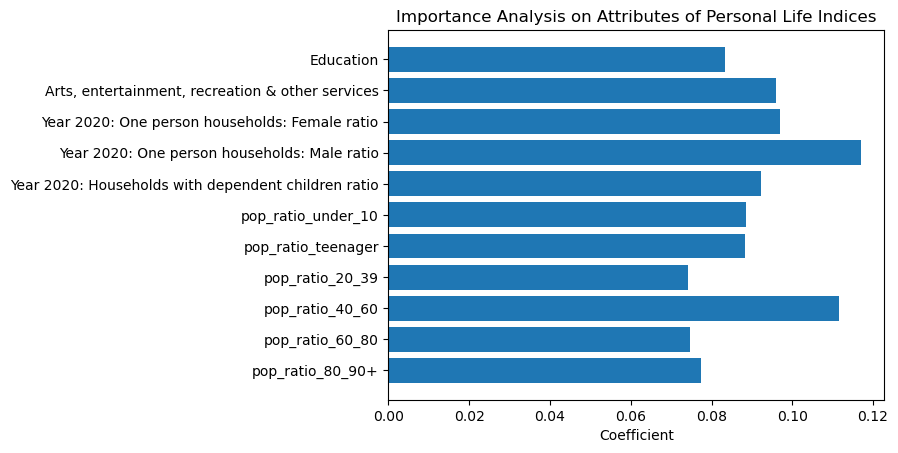

In [80]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(pl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, pl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Personal Life Indices')
plt.savefig('Figure/personal_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [81]:
pl_feature_importance_score_csv = pd.DataFrame(pl_hundredYard_forest.feature_importances_)
pl_feature_importance_score_csv.index = pl_hundredYard_forest.feature_names_in_[:]
pl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
pl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/personal_life_model_scores.csv"))  

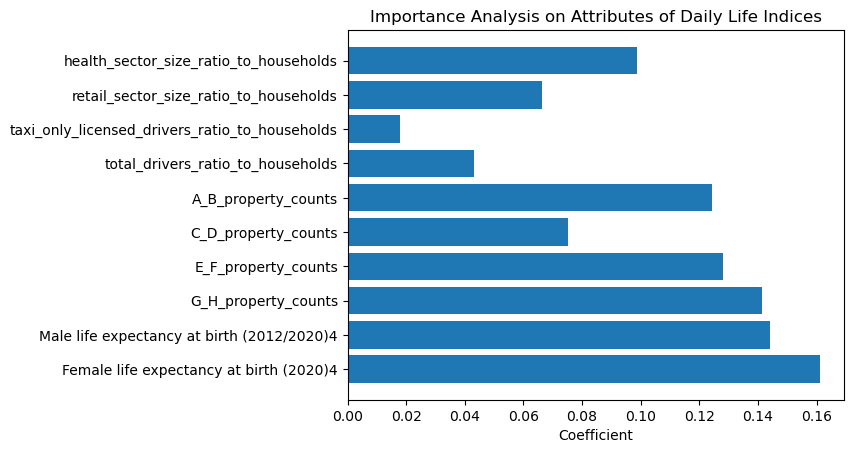

In [82]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(dl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, dl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Daily Life Indices')
plt.savefig('Figure/daily_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [83]:
dl_feature_importance_score_csv = pd.DataFrame(dl_hundredYard_forest.feature_importances_)
dl_feature_importance_score_csv.index = dl_hundredYard_forest.feature_names_in_[:]
dl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
dl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/daily_life_model_scores.csv"))  

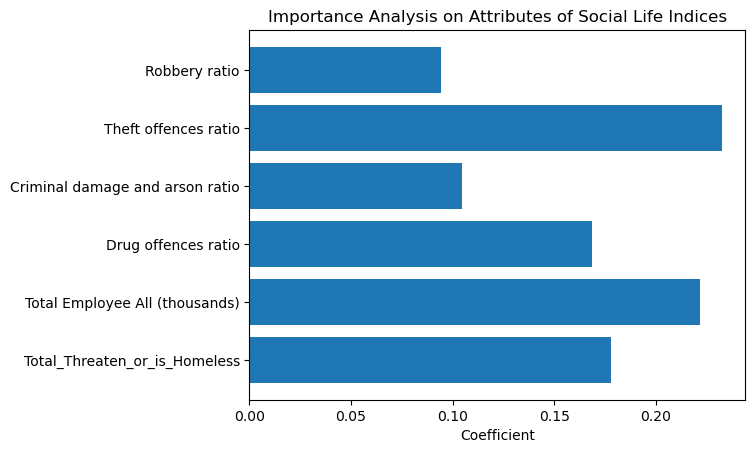

In [87]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(sl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, sl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Life Indices')
plt.savefig('Figure/social_life_group_random_forest_importance_score_analysis.png')
plt.show()

In [89]:
sl_feature_importance_score_csv = pd.DataFrame(sl_hundredYard_forest.feature_importances_)
sl_feature_importance_score_csv.index = sl_hundredYard_forest.feature_names_in_[:]
sl_feature_importance_score_csv.columns = ['RF Importance']
cwd = os.getcwd()
sl_feature_importance_score_csv.to_csv(os.path.join(cwd, "ResultTables/social_life_model_scores.csv"))  

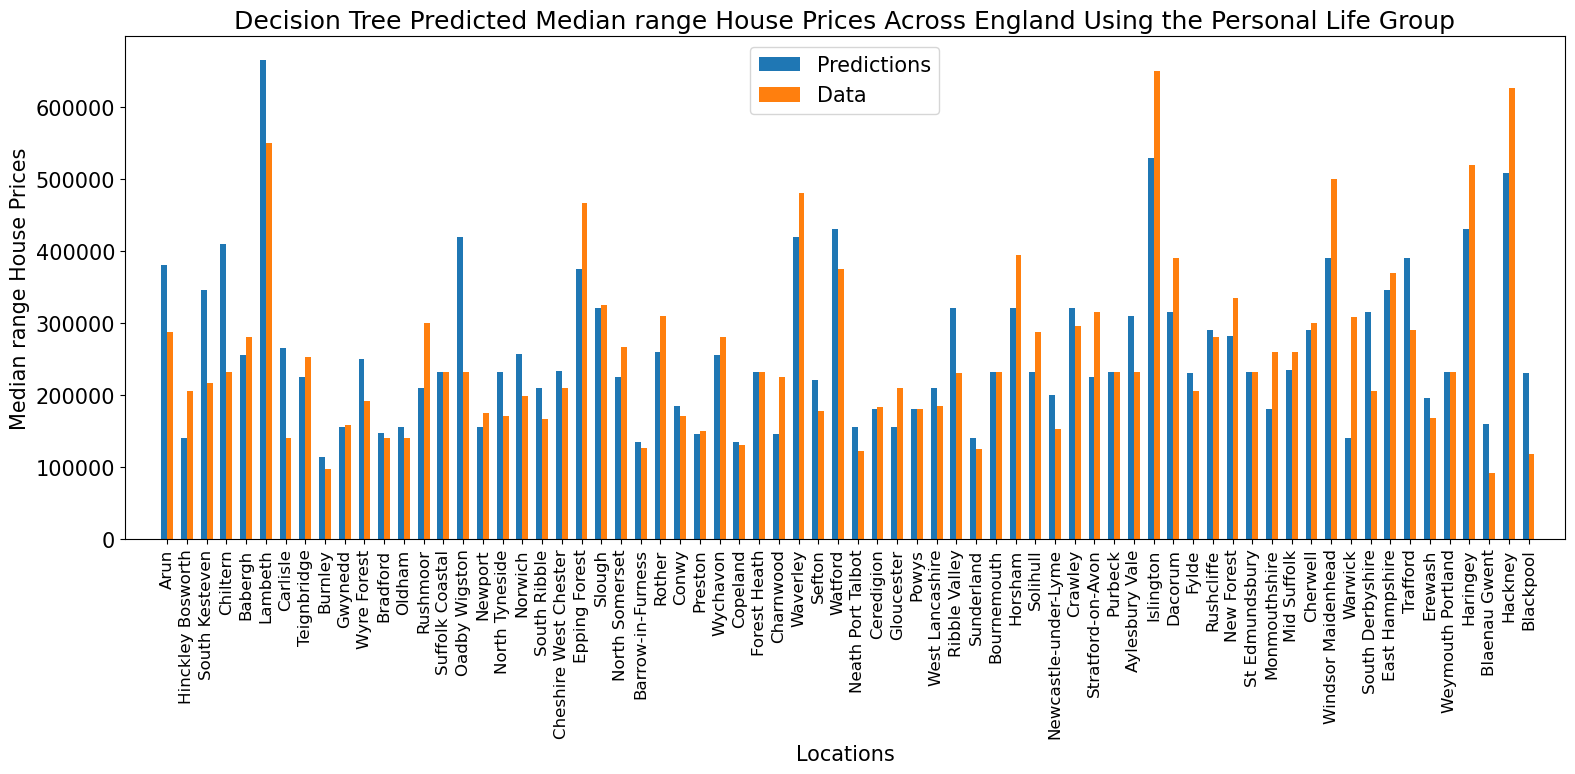

In [90]:
#Plot and save the test results
f_predictions = pl_predictions
test_y = test_pl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Personal Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_pl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/pl_model_Random_forest_test_result.png')
plt.show()

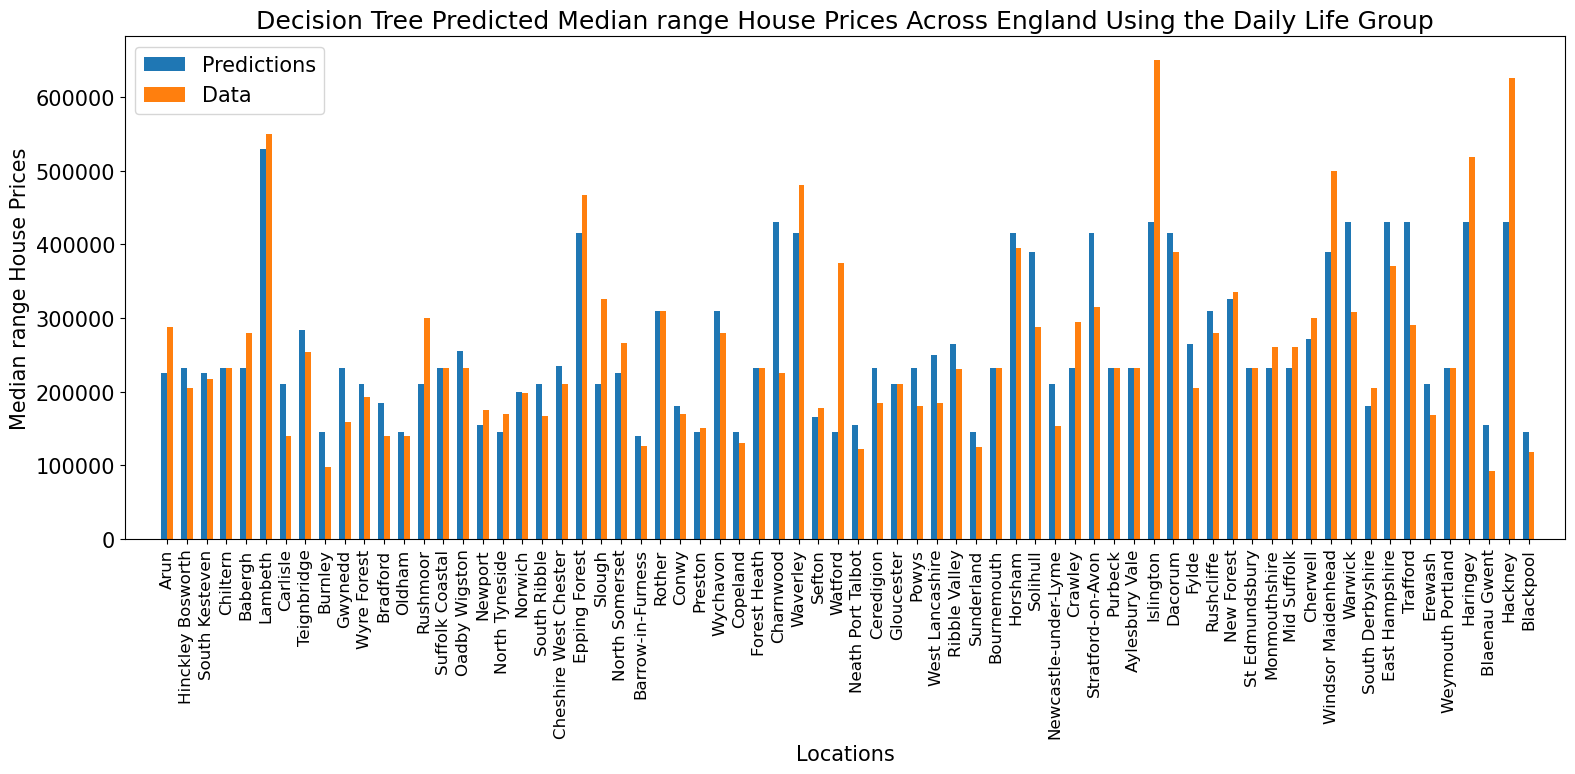

In [91]:
#Plot and save the test results
f_predictions = dl_predictions
test_y = test_dl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Daily Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_dl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/dl_model_Random_forest_test_result.png')
plt.show()

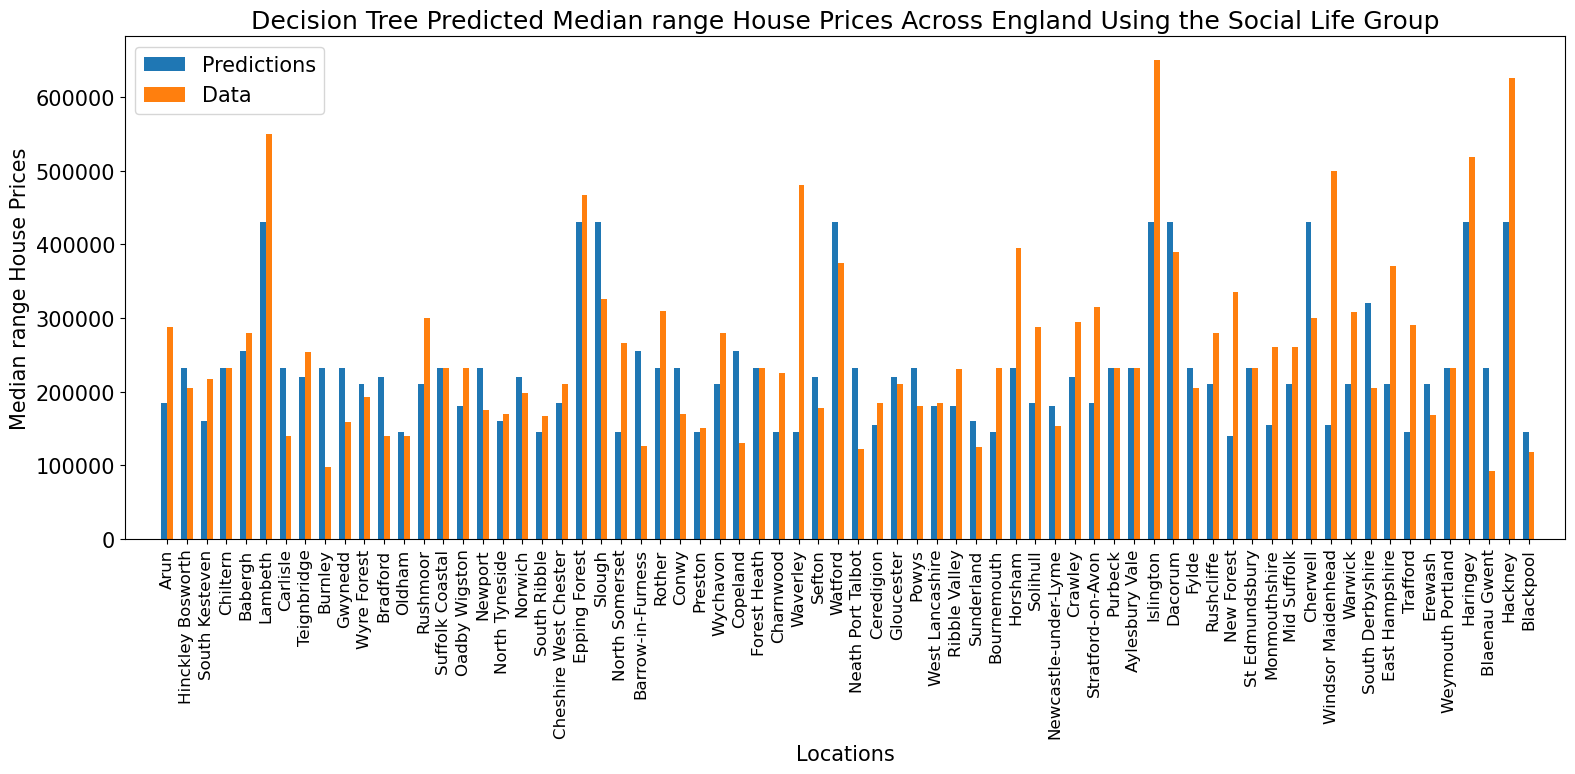

In [92]:
#Plot and save the test results
f_predictions = sl_predictions
test_y = test_sl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Social Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_sl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/sl_model_Random_forest_test_result.png')
plt.show()